In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Reading the data
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

In [3]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
data.shape

(25, 2)

In [5]:
# Statistical analysis
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


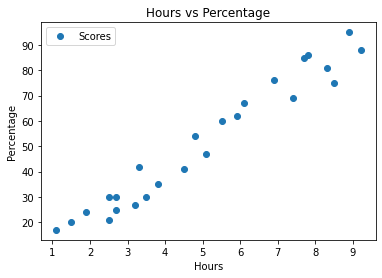

In [6]:
# let's visualize the data
data.plot(x='Hours',y='Scores',style='o')
plt.title("Hours vs Percentage")
plt.xlabel("Hours")
plt.ylabel("Percentage")
plt.show()

#### Let's split and train the data

In [7]:
X = data.iloc[:,:-1].values
Y = data.iloc[:,1].values

In [8]:
# Let's train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size = 0.2,random_state=0)

In [9]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(20, 1)
(5, 1)
(20,)
(5,)


In [10]:
# Let's build the model
from sklearn.linear_model import LinearRegression
ft = LinearRegression()
ft.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [11]:
# Let's make prediction on test set
y_pred = ft.predict(X_test)

In [12]:
from sklearn.metrics import mean_squared_error 
from sklearn import metrics
print(mean_squared_error(y_test,y_pred)) 
print(metrics.mean_absolute_error(y_test,y_pred))

21.598769307217406
4.183859899002975


In [13]:
# Let's compare the actual v/s predicted
df = pd.DataFrame({'actual': y_test,'predicted': y_pred})
df

,actual,predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


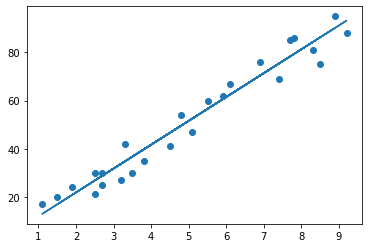

In [17]:
# Plotting the regression line
line = ft.coef_*X+ft.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Let's evaluate the model using our own inputs

In [24]:
# Considering hour as 9.25
my_pred = ft.predict([[9.25]])
my_pred

array([93.69173249])